# Regresión lineal simple

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [11]:
df= pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [15]:
# Exploración de datos

df. describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [23]:
cdf= df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230


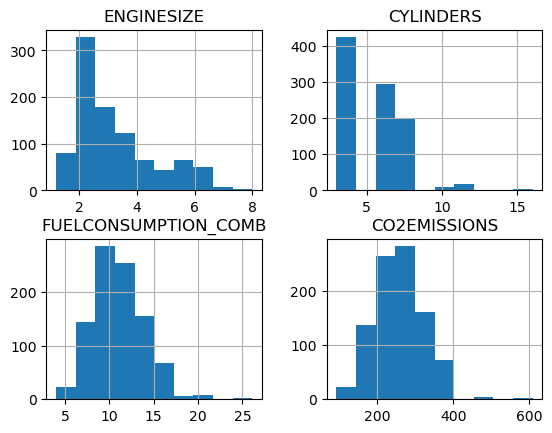

In [25]:
viz= df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
viz.hist()
plt.show()

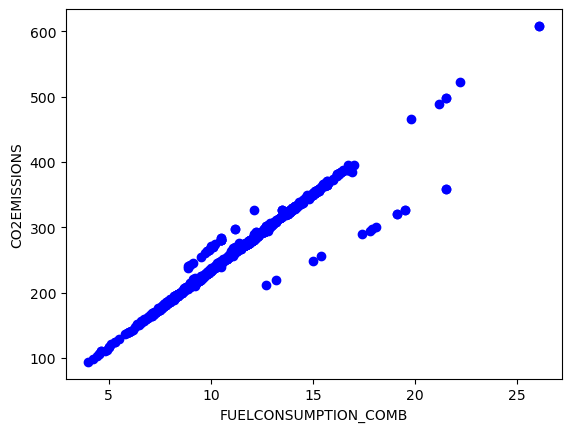

In [27]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color= "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

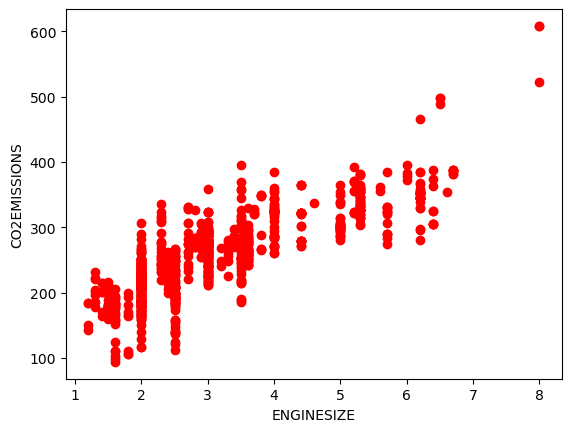

In [29]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color= "red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

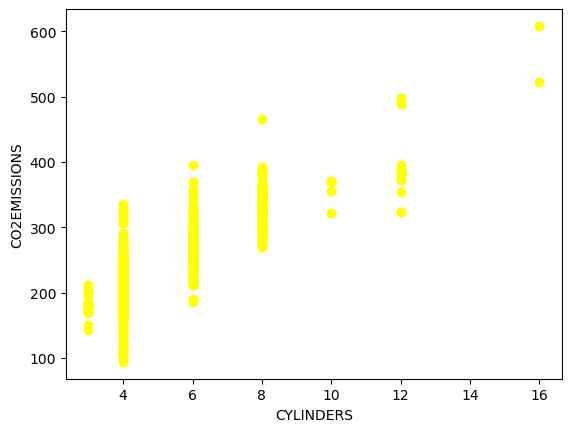

In [31]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color= "yellow")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [33]:
# 80% de los datos se van a tomar de manera aleatoria, los que digan true se tomaran y los false, no

msk= np.random.rand(len(df))<=.80
msk

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False,

In [37]:
train= cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
4,2.0,4,9.8,230
5,2.0,4,9.8,231
...,...,...,...,...
940,2.0,4,9.4,219
941,2.0,4,9.4,219
942,2.0,4,9.9,232
943,2.0,4,10.1,236


In [39]:
# sacar el 20% remanente, para eso se usa el simbolo ~
test= cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
3,2.0,4,10.3,242
13,2.9,6,12.3,288
17,4.0,8,14.6,343
20,2.0,4,8.2,190
33,2.0,4,9.3,217
...,...,...,...,...
921,2.0,4,8.5,198
923,2.0,4,10.2,237
932,2.0,4,9.8,229
936,2.0,4,9.6,224


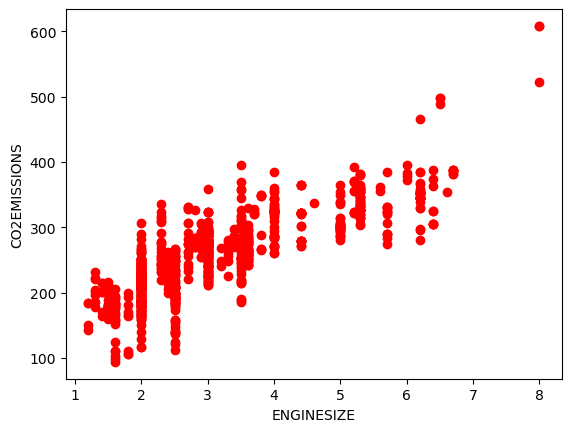

In [41]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color= "red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [47]:
# Esta biblióteca se tiene que manejar con arreglos

from sklearn import linear_model
regr= linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression()

In [49]:
print("Coeficiente de pendiente", regr.coef_)
print("Coeficiente de intercepto", regr.intercept_)

Coeficiente de pendiente [[36.97745115]]
Coeficiente de intercepto [141.54873349]


CO2EMISSIONS= 141.54+ 36.97 (ENGINESIZE)

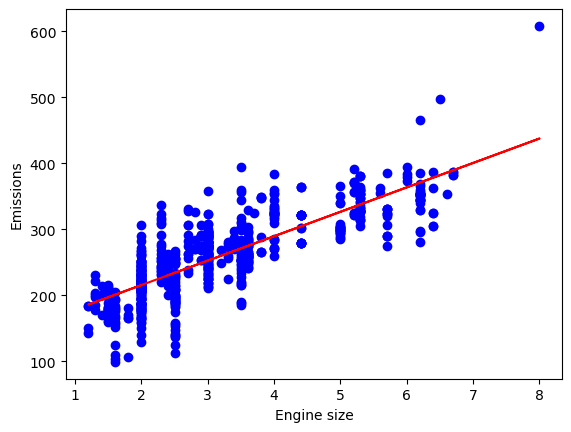

In [64]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= "blue")
plt.plot(train_x, regr.coef_[0][0]*train_x+ regr.intercept_[0],"-r")
plt.xlabel( "Engine size")
plt.ylabel( "Emissions")
plt.show()

In [66]:
#Predecir Y con el modelo

from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat= regr.predict(test_x)

In [68]:
# Datos que se predicen
test_y_hat

array([[215.50363579],
       [248.78334182],
       [289.45853808],
       [215.50363579],
       [215.50363579],
       [252.48108693],
       [248.78334182],
       [252.48108693],
       [252.48108693],
       [289.45853808],
       [215.50363579],
       [289.45853808],
       [289.45853808],
       [252.48108693],
       [304.24951854],
       [304.24951854],
       [304.24951854],
       [304.24951854],
       [252.48108693],
       [252.48108693],
       [252.48108693],
       [252.48108693],
       [304.24951854],
       [252.48108693],
       [304.24951854],
       [252.48108693],
       [437.36834267],
       [437.36834267],
       [193.3171651 ],
       [241.38785159],
       [241.38785159],
       [215.50363579],
       [370.8089306 ],
       [215.50363579],
       [215.50363579],
       [274.66755762],
       [274.66755762],
       [215.50363579],
       [233.99236136],
       [241.38785159],
       [337.52922457],
       [337.52922457],
       [337.52922457],
       [337

In [70]:
# Datos reales
test_y

array([[242],
       [288],
       [343],
       [190],
       [217],
       [273],
       [267],
       [227],
       [227],
       [325],
       [218],
       [287],
       [294],
       [214],
       [322],
       [322],
       [271],
       [271],
       [323],
       [241],
       [323],
       [241],
       [364],
       [256],
       [321],
       [223],
       [522],
       [608],
       [214],
       [221],
       [244],
       [222],
       [346],
       [225],
       [237],
       [269],
       [259],
       [222],
       [267],
       [274],
       [321],
       [304],
       [358],
       [339],
       [385],
       [165],
       [327],
       [345],
       [281],
       [242],
       [305],
       [305],
       [221],
       [331],
       [317],
       [326],
       [277],
       [249],
       [301],
       [370],
       [313],
       [246],
       [314],
       [314],
       [211],
       [298],
       [275],
       [283],
       [274],
       [321],
       [328],
      

In [80]:
# generar indicadores para comprobar que tan confiable es la ecuación que se generó con la regresión

print(" Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat- test_y)))
print(" Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat- test_y)**2))
print(" R2- score: %.2f" % r2_score(test_y_hat,test_y))

 Mean absolute error: 30.90
 Residual sum of squares (MSE): 1698.99
 R2- score: 0.40


In [82]:
# Mean absolute error: 30.90  error promedio de 30.90 unidades 
# Residual sum of squares (MSE): 1698.99  # suma de errores al cuadrado promedio
# R2- score: 0.40 porcentaje de explicación entre ambas variables

In [84]:
cdf= df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230


In [86]:
# Regresión multiple par aumentar la confiablidad de la ecuación para predecir

x=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coeficientes de variables inpendientes", regr.coef_)
print("Coeficiente de intercepto", regr.intercept_)

Coeficientes de variables inpendientes [[ 0.65874613  2.41446189 20.43252709]]
Coeficiente de intercepto [17.29621336]


CO2EMISSIONS= 17.29+ .65 (ENGINESIZE)+ 2.41 (CYLINDERS)+ 20.43 (FUELCONSUMPTION_COMB)

In [95]:
y_hat= regr.predict(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
x=np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(test[["CO2EMISSIONS"]])

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [97]:
#Evaluación
# Mejoran mucho los resultados de esta manera

print(" Mean absolute error: %.2f" % np.mean(np.absolute(y_hat- y)))
print(" Residual sum of squares (MSE): %.2f" % np.mean((y_hat- y)**2))
print(" R2- score: %.2f" % r2_score(y_hat,y))

 Mean absolute error: 7.87
 Residual sum of squares (MSE): 381.87
 R2- score: 0.93


# Otros modelos de regresión

In [126]:
def pol_grado1(x, Beta_0, Beta_1):
    y=Beta_0 + Beta_1 * x
    return y

In [128]:
x= np.arange(-5, 5, .1)
y= pol_grado1(x,3,2)
y_noise= np.random.normal(0,1,size= x.size)
ydata= y+ y_noise

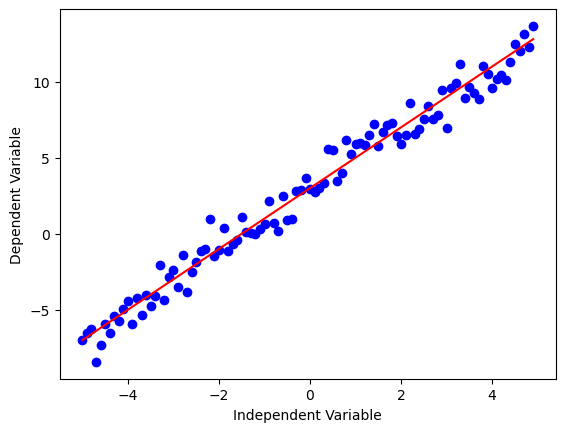

In [130]:
plt.plot(x,ydata, "bo")
plt.plot(x,y,"r")
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

In [132]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado1, x, ydata)

In [134]:
print( "beta_0 =",popt[0], "beta_1 =", popt[1])

beta_0 = 2.945219727200443 beta_1 = 1.986751001767412


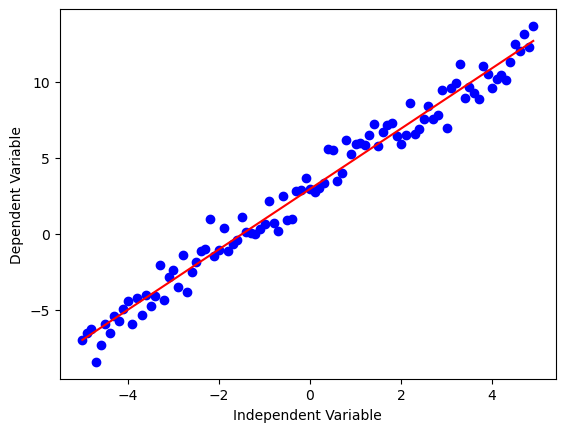

In [136]:
y_ajust= pol_grado1(x, popt[0], popt[1])
plt.plot(x,ydata, "bo")
plt.plot(x,y_ajust,"r")
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

In [154]:
# Modelo polinomial de tercer grado

def pol_grado3(x, Beta_0, Beta_1, Beta_2, Beta_3):
    y=Beta_0 + Beta_1 * x+ Beta_2* (x**2)+ Beta_3*(x**3)
    return y

In [156]:
x= np.arange(-5, 5, .1)
y= pol_grado3(x,3,1,1,1)
y_noise= 20* np.random.normal(0,1,size= x.size)
ydata= y+ y_noise

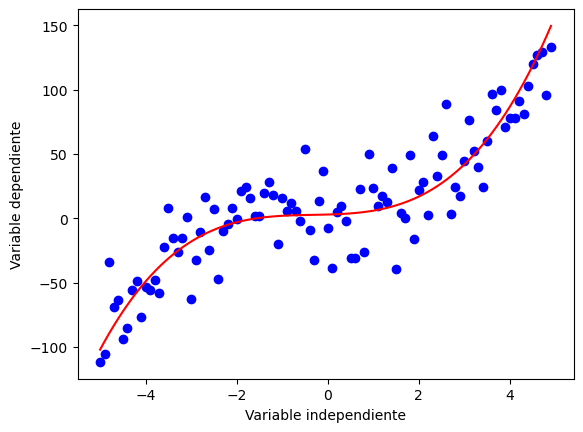

In [158]:
plt.plot(x,ydata, "bo")
plt.plot(x,y,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable independiente")
plt.show()

In [160]:
msk= np.random.rand(len(x))<=.80
msk

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False])

In [162]:
train_x= x[msk]
test_x= x[~msk]
train_y=ydata[msk]
test_y= ydata[~msk]

In [164]:
popt, pcov = curve_fit(pol_grado3, train_x, train_y)

In [166]:
print("beta_0 =",popt[0],"beta_1 =",popt[1],"beta_2 =",popt[2],"beta_3 =",popt[3])

beta_0 = 9.37937351637394 beta_1 = 0.2622935461789305 beta_2 = 0.4326126089814024 beta_3 = 0.9950597240498577


In [176]:
# Predicción

y_hat= pol_grado3(test_x, popt[0],popt[1],popt[2],popt[3])

In [178]:
print(" Mean absolute error: %.2f" % np.mean(np.absolute(y_hat- test_y)))
print(" Residual sum of squares (MSE): %.2f" % np.mean((y_hat- test_y)**2))
print(" R2- score: %.2f" % r2_score(y_hat,test_y))

 Mean absolute error: 20.78
 Residual sum of squares (MSE): 850.98
 R2- score: 0.76


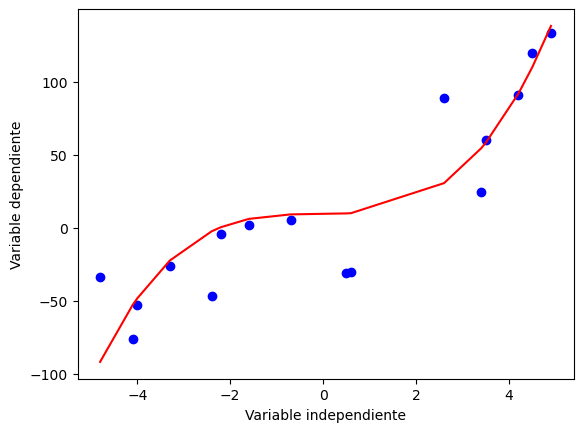

In [182]:
plt.plot(test_x,test_y, "bo")
plt.plot(test_x,y_hat,"r")
plt.ylabel("Variable dependiente")
plt.xlabel("Variable independiente")
plt.show()

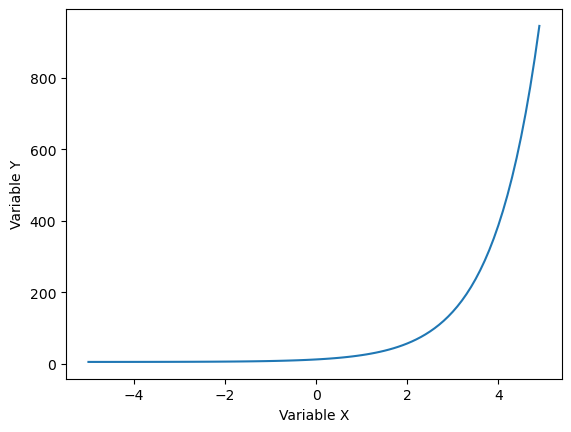

In [188]:
# Modelo exponencial
# Y= a+b exp (x)

x= np.arange(-5,5,.1)
y= 5+7 *np.exp(x)

plt.plot(x,y)
plt.ylabel("Variable Y")
plt.xlabel("Variable X")
plt.show()

C:\Users\odela\AppData\Local\Temp\ipykernel_1184\4263371390.py:5: RuntimeWarning: invalid value encountered in log
  y= 2+6 *np.log(x)


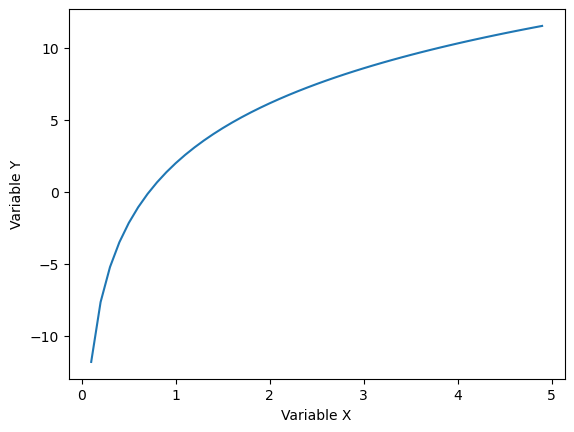

In [190]:
# Modelo logarítmico
# Y= a+b ln (x)

x= np.arange(-5,5,.1)
y= 2+6 *np.log(x)

plt.plot(x,y)
plt.ylabel("Variable Y")
plt.xlabel("Variable X")
plt.show()

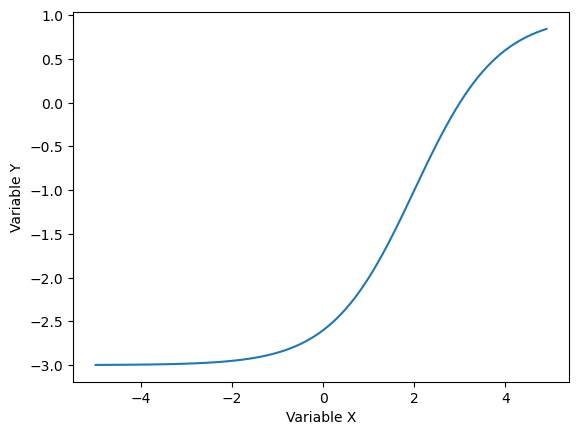

In [200]:
# Modelo sigmoidal o logístico
# Y= a+ (b / (1 + c** (x-d)))

x= np.arange(-5,5,.1)
y= 1-4 / (1+np.power(3,x-2))

plt.plot(x,y)
plt.ylabel("Variable Y")
plt.xlabel("Variable X")
plt.show()